### Project Overview:
- For this project you will need to fetch ever company in the Russell 2000 for 2020 and get the Adj Close for each company
- We would like to see the Dips and Gains for the Daily Returns of every stock under 10 dollars in ascending order.
- Repeat the same process for every company in the index
- If we were to have every company in the Russell 2000 in a portfolio which 20 companies would make up the top end of the index for 2020
- We want you to than go back 5 years and see how these companies performed pre- Covid. What is the max return we would have received during this 5 year period considering volatility.

### Project Approach
- Fetch all companies in Russell 2000
- Use pandas Datareader to get the Adj Close
- Calculate the Daily returns for each security
- Find the top 20 Gains and Dips for returns 
- Put every security into a portfolio and optimize the portfolio with 5 years of data (2015-2019end)
- Find the top companies the make up the index by weight and put them into a portfolio 
- Run a portfolio optimization on the portfolio using Markowitz Efficient Frontier. 

### libraries


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas_datareader import data as web

In [3]:
russ = pd.read_excel("resources/Russle_2000_2020.xlsx", index_col='Ticker')

### Data Overview 
- For 2020 we have 1999 conpanies in the Russle 2000

In [4]:
russ

,Name
Ticker,
AAN,"Aaron's, Inc."
AAOI,"Applied Optoelectronics, Inc."
AAON,"AAON, Inc."
AAT,"American Assets Trust, Inc."
AAWW,"Atlas Air Worldwide Holdings, Inc."
...,...
ZIXI,Zix Corp.
ZUMZ,"Zumiez, Inc."
ZUO,"Zuora, Inc."


In [5]:
russ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, AAN to ZYXI
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1999 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


### Adj Closes
- Will import data already fetched previously
- Will download the Adj Close for each security for 2020 beginning 2020-1-1 to current using pandas Datareader

In [6]:
tickers = list(russ.index)

In [8]:
tickers

['AAN',
 'AAOI',
 'AAON',
 'AAT',
 'AAWW',
 'AAXN',
 'ABCB',
 'ABEO',
 'ABG',
 'ABM',
 'ABTX',
 'AC',
 'ACA',
 'ACAD',
 'ACBI',
 'ACCO',
 'ACER',
 'ACHN',
 'ACIA',
 'ACIW',
 'ACLS',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ADC',
 'ADES',
 'ADMA',
 'ADMS',
 'ADNT',
 'ADRO',
 'ADSW',
 'ADTN',
 'ADUS',
 'ADVM',
 'AEGN',
 'AEIS',
 'AEL',
 'AEO',
 'AERI',
 'AFI',
 'AFIN',
 'AFMD',
 'AGE',
 'AGEN',
 'AGLE',
 'AGM',
 'AGS',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AI',
 'AIMC',
 'AIMT',
 'AIN',
 'AIR',
 'AIRG',
 'AIT',
 'AJRD',
 'AJX',
 'AKBA',
 'AKCA',
 'AKR',
 'AKRO',
 'AKRX',
 'AKS',
 'AKTS',
 'ALBO',
 'ALCO',
 'ALDR',
 'ALDX',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG',
 'ALGT',
 'ALLK',
 'ALLO',
 'ALOT',
 'ALRM',
 'ALTM',
 'ALTR',
 'ALX',
 'AMAG',
 'AMAL',
 'AMBA',
 'AMBC',
 'AMC',
 'AMED',
 'AMEH',
 'AMK',
 'AMKR',
 'AMN',
 'AMNB',
 'AMOT',
 'AMPH',
 'AMRC',
 'AMRS',
 'AMRX',
 'AMSC',
 'AMSF',
 'AMSWA',
 'AMTB',
 'AMWD',
 'ANAB',
 'ANDE',
 'ANF',
 'ANGO',
 'ANH',
 'ANIK',
 'ANIP',
 'AOBC

In [9]:
data = pd.DataFrame()

In [10]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

In [11]:
data

,AAN,AAOI,AAON,AAT,AAWW,AAXN,ABCB,ABEO,ABG,ABM,...,YRCW,ZAGG,ZEUS,ZGNX,ZIOP,ZIXI,ZUMZ,ZUO,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,57.544491,12.500,49.715336,44.363808,27.730000,76.559998,42.455322,3.21,111.330002,38.128220,...,2.58,8.10,17.666327,52.340000,4.62,6.84,34.090000,14.76,5.880,7.920000
2020-01-03,56.846020,12.120,50.173725,45.251480,27.450001,73.930000,42.286449,2.90,108.389999,38.028980,...,2.57,8.15,17.437153,51.080002,4.50,6.84,33.830002,14.77,5.810,8.350000
2020-01-06,57.554474,12.150,50.084038,45.586823,27.430000,68.750000,42.157314,2.77,107.739998,38.019058,...,2.56,8.25,17.486971,51.200001,4.49,7.32,34.410000,14.67,5.700,8.420000
2020-01-07,57.464668,12.430,49.974426,44.718876,26.370001,69.769997,41.869251,2.57,103.790001,37.701488,...,2.55,8.10,17.546757,51.830002,4.53,7.39,34.180000,14.69,5.560,8.540000
2020-01-08,58.472469,12.700,49.834915,44.856956,27.160000,69.610001,42.365921,2.62,103.129997,38.108376,...,2.41,7.99,17.626471,52.020000,4.59,7.51,34.480000,14.66,5.310,8.470000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,49.279999,10.240,57.820000,34.640629,40.560001,97.269997,29.629999,3.01,82.610001,36.750000,...,2.38,4.49,13.080000,32.040001,3.25,7.67,30.180000,12.25,5.625,22.889999
2020-06-09,48.470001,9.695,57.290001,33.090000,41.310001,100.269997,28.340000,2.90,81.519997,35.560001,...,2.12,3.91,13.380000,30.870001,3.16,7.50,28.799999,12.42,5.390,20.000000
2020-06-10,45.630001,9.390,56.349998,30.889999,40.950001,103.250000,26.299999,2.78,78.110001,33.740002,...,1.84,3.61,12.120000,30.299999,3.28,7.21,27.129999,12.80,5.210,21.260000


### Getting todays Date as a variable 

In [13]:
todays_date = data[-1:].iloc[0].name

In [14]:
todays_date

Timestamp('2020-06-12 00:00:00')

### Failed and Passed
- 54 companies failed and 1945 passed

In [15]:
passed = pd.DataFrame(passed, columns=["Tickers"])

In [16]:
passed.to_csv("resources/passed_tickers.csv")

In [17]:
len(failed)

49

In [18]:
len(passed)

1950

### Getting Penny Stocks 
- For penny stocks we will get all companies in the Russell 2000 we will take all stocks under 10 bucks to consideration as of the begining of 2020

In [19]:
penny_Stocks = data[data.apply(lambda x: x < 10)].dropna(axis = 1)

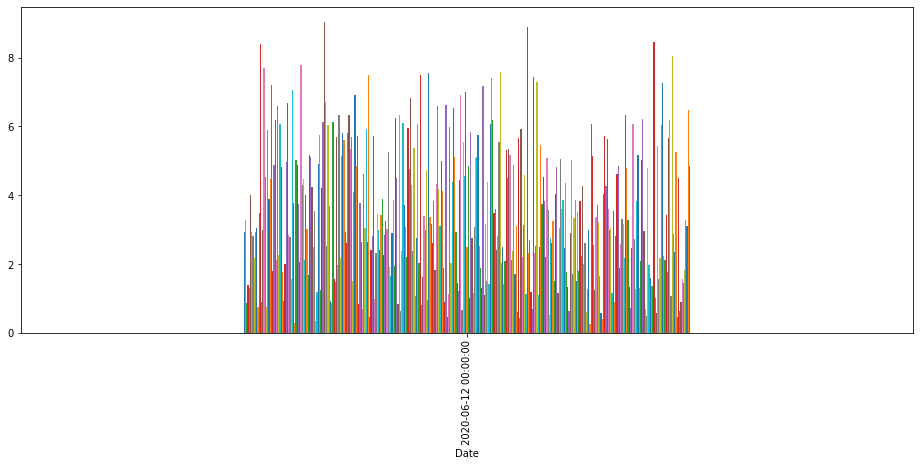

In [20]:
penny_Stocks[-1:].plot(kind = "bar", figsize = (16,6), legend = None)

## Daily Returns for PennyStocks
- We will look at the penny stocks Dips and spikes
- Will check for today's Date

In [21]:
penny_returns = penny_Stocks.pct_change()

In [22]:
top_20_penny_spikes = penny_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(20)

In [23]:
top_20_penny_spikes["Adj Close"] = data[list(top_20_penny_spikes.index)][-1:].transpose().values

In [24]:
top_20_penny_spikes.columns = ["return", "Adj Close"]

In [25]:
top_20_penny_spikes

,return,Adj Close
NE,0.387097,0.43
WRTC,0.306818,8.05
CHAP,0.296572,0.87
PRTY,0.253521,1.78
OAS,0.204082,1.18
RNET,0.201835,2.62
TUP,0.200000,4.80
TCS,0.197802,3.27
INWK,0.177419,1.46
VRAY,0.168421,2.22


## Penny Dips 
- Will loook at top 20 penny shares that took the biggest dips

In [26]:
top_20_penny_dips = penny_returns[-1:].transpose().sort_values(todays_date, ascending = True).head(20)

In [27]:
top_20_penny_dips["Adj Close"] = data[list(top_20_penny_dips.index)][-1:].transpose().values

In [28]:
top_20_penny_dips.columns = ["returns", " Adj Close"]

In [29]:
top_20_penny_dips.to_csv("resources/top_20_penny_dips.csv")

In [30]:
top_20_penny_dips

,returns,Adj Close
MCHX,-0.090361,1.510
OSMT,-0.084532,5.090
TREC,-0.082267,5.020
NL,-0.073746,3.140
AGE,-0.058750,0.753
LEE,-0.049587,1.150
LEAF,-0.048443,2.750
JILL,-0.046676,0.674
YRCW,-0.046632,1.840
ENDP,-0.041899,3.430


### Entire Index DIPS
- We will look at the dips for the entire market

In [31]:
index_returns = data.pct_change()

In [32]:
russ_top_30_dips = index_returns[-1:].transpose().sort_values(todays_date).head(30)

In [33]:
russ_top_30_dips["Adj Close"] = data[list(russ_top_30_dips.index)][-1:].transpose()[todays_date].values

In [34]:
russ_top_30_dips.columns = ["returns", "Adj Close"]

In [35]:
russ_top_30_dips

,returns,Adj Close
MCHX,-0.090361,1.510000
OSMT,-0.084532,5.090000
TREC,-0.082267,5.020000
ARL,-0.077640,8.910000
NL,-0.073746,3.140000
SYNL,-0.072905,8.520000
ALOT,-0.072207,6.810000
TWIN,-0.060703,5.880000
UNB,-0.060092,18.299999
AGE,-0.058750,0.753000


### Russ Spikes

In [36]:
russ_top_30_spikes = index_returns[-1:].transpose().sort_values(todays_date, ascending = False).head(30)

In [37]:
russ_top_30_spikes["ADj Close"] = data[list(russ_top_30_spikes.index)][-1:].transpose()

In [38]:
russ_top_30_spikes.columns = ["returns", "Adj Close"]

In [39]:
 russ_top_30_spikes

,returns,Adj Close
NE,0.387097,0.430000
HTZ,0.373786,2.830000
WRTC,0.306818,8.050000
CHAP,0.296572,0.870000
PVAC,0.288560,12.615000
PRTY,0.253521,1.780000
TGI,0.252583,10.910000
OAS,0.204082,1.180000
RNET,0.201835,2.620000
TUP,0.200000,4.800000


### Russell 2000 as a portfolio - 2020
 - We want to know which 20 companies in the russell 2000 would have generated the highest returns for 2020 so far. 
 - there are a little over 1900 companies listed  in the russell 2000 
 - We will create 2000 portfolios that will contain these companies and reandomly weigh each
 - based of the daily returns of each company we can generate the expected returns as well as a sharp ratio for each portfolio in the 2000
 - USing this we will find the portfilio with the highest return, best sharp, and lowest vol

In [40]:
daily_returns = data.pct_change()

In [46]:
n_portfolios = 1000
all_weights = np.zeros((n_portfolios, len(passed)))
all_returns = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_sharp = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(passed)))
    weights = weights/weights.sum()
    
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(daily_returns.mean() * weights) * 252 
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    all_sharp[ind] = all_returns[ind]/all_vol[ind]

### Max Sharp

In [47]:
all_vol

array([0.64037935, 0.64836733, 0.64539678, 0.64804229, 0.64672888,
       0.64305643, 0.65021457, 0.64545588, 0.65381467, 0.6464269 ,
       0.6502663 , 0.64754183, 0.64560131, 0.64782955, 0.64699142,
       0.64718726, 0.6491332 , 0.64548818, 0.64949978, 0.65209406,
       0.64837615, 0.64664021, 0.64017988, 0.64917775, 0.64772285,
       0.65016124, 0.6421155 , 0.64651425, 0.6487602 , 0.64375271,
       0.64373372, 0.64564902, 0.65134754, 0.65130556, 0.64871632,
       0.6562461 , 0.64269994, 0.65274145, 0.64859591, 0.64666307,
       0.64611619, 0.6482018 , 0.64689767, 0.65014276, 0.64881319,
       0.65032394, 0.65018637, 0.64969322, 0.65132261, 0.6491514 ,
       0.64683251, 0.64584678, 0.64718321, 0.64539717, 0.64615842,
       0.64371334, 0.64606512, 0.64977023, 0.63958772, 0.65387918,
       0.64304278, 0.64607942, 0.64972822, 0.65016031, 0.64695527,
       0.64854536, 0.64690057, 0.64377163, 0.64775551, 0.64270214,
       0.65003171, 0.64324752, 0.64435103, 0.6462242 , 0.64322

In [48]:
len(daily_returns.columns)

1950

In [49]:
all_weights

array([[1.47084168e-04, 8.64119544e-04, 6.08928037e-04, ...,
        1.44518865e-04, 1.75245156e-04, 4.87626266e-04],
       [9.87196255e-05, 4.62808680e-04, 6.00602224e-05, ...,
        3.64618236e-04, 8.71011946e-04, 4.85528476e-04],
       [1.64744086e-04, 5.18405663e-04, 8.92418405e-04, ...,
        2.40027715e-04, 6.46831876e-04, 4.20122621e-04],
       ...,
       [2.84019634e-04, 7.02256475e-05, 1.35412498e-05, ...,
        9.82047227e-04, 3.08219100e-04, 3.78781296e-04],
       [8.75420721e-04, 2.89682436e-04, 9.38596577e-04, ...,
        7.55787054e-04, 1.00856066e-03, 9.07751723e-04],
       [6.86415760e-04, 3.06347291e-04, 6.43103034e-04, ...,
        8.98508900e-04, 9.19081578e-04, 4.49028545e-05]])

In [50]:
len(passed)

1950

In [53]:
max_sharp = all_sharp.argmax()

In [54]:
max_sharp

971

In [55]:
max_return = all_returns.argmax()

In [56]:
max_return

971

In [57]:
lowest_vol = all_vol.argmin()

In [58]:
lowest_vol

599

## 2020 Russell Optimization Overview
- With covid the best portfolio composed in the index would have only provided a 8% return year to date. 
- Will take a look at the companies that would have provided this return below

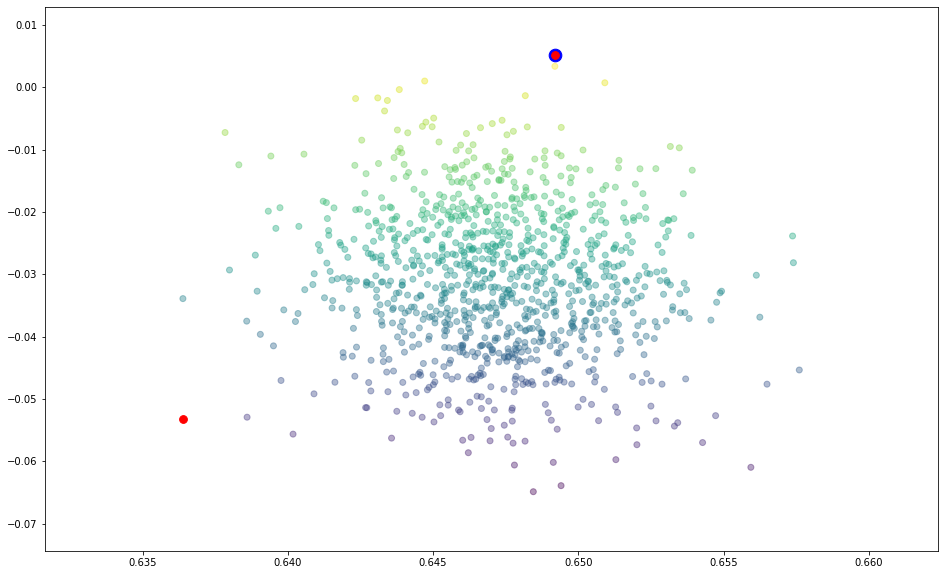

In [68]:
plt.figure(figsize=(16,10))
plt.scatter(all_vol, all_returns, c = all_sharp, alpha=0.4)
plt.scatter(all_vol[max_return], all_sharp[max_return], c= "b", s = 160)
plt.scatter(all_vol[max_sharp], all_sharp[max_sharp], c= "r", s = 60)
plt.scatter(all_vol[lowest_vol], all_sharp[lowest_vol], c= "r", s = 60)

#### Russ Max return analysis
- For 2020 it appears the best portfolio consisting of all 2000 companies would not have given you much of. a return as all.But this is an unrealistic portfolio. What we c antke from this is which 20 companies would have allocatedthe most weight in the portfolio for 2020. 
- We can then run a 5 year analysis on those companies to see what return we may have gotten pre-covid 

In [69]:
russell_2020_optimize = pd.DataFrame(all_returns, columns=["returns"])

In [71]:
russell_2020_optimize["sharp"] = all_sharp

In [72]:
russell_2020_optimize["vol"] = all_vol

In [81]:
weights_opti = pd.DataFrame(all_weights, columns= data.columns)

In [101]:
###weights_opti.to_csv("resources/russ_2020_optimized_weights.csv")

In [82]:
russell_2020_optimize = pd.concat([russell_2020_optimize, weights_opti], axis=1)

In [100]:
## russell_2020_optimize.to_csv("resources/rus2020_optimized_port.csv")

In [88]:
all_returns.min()

-0.06486075598498382

In [94]:
top_20_russ = russell_2020_optimize[russell_2020_optimize["returns"] == russell_2020_optimize["returns"].max() ].transpose().drop(["returns"
                                                                    , "vol", "sharp"]).sort_values(971, ascending = False).head(20)

In [97]:
top_20_20202_russ_tickers = list(top_20_russ.index)

### Top 20 over 5 years

In [102]:
top_20_weighted_companies = pd.DataFrame()

In [103]:
for t in top_20_20202_russ_tickers:
    top_20_weighted_companies[t] = web.DataReader(t, data_source="yahoo", start = "2015-1-1", end = "2019-12-31")["Adj Close"]

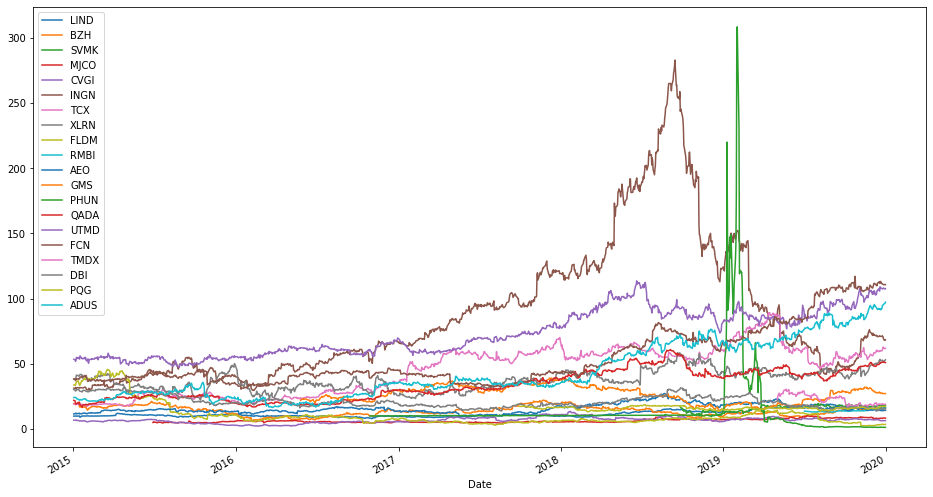

In [132]:
top_20_weighted_companies.plot(figsize = (16,9))
plt.savefig("resources/top_20_optimized.png")

#### Top 20 optimization 
- lets see what returns we could hvve received for a portfolio consisting of these 20 companies over a 5 year span 

In [115]:
top_20_returns = top_20_weighted_companies.pct_change()

In [116]:
n_portfolios = 2500
all_weights = np.zeros((n_portfolios, len(top_20_20202_russ_tickers)))
all_returns = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_sharp = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(top_20_20202_russ_tickers)))
    weights = weights/weights.sum()
    
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(top_20_returns.mean() * weights) * 252 
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(top_20_returns.cov() * 252, weights)))
    all_sharp[ind] = all_returns[ind]/all_vol[ind]

In [117]:
max_returns = all_returns.argmax()

In [118]:
max_sharp = all_sharp.argmax()

In [126]:
lowest_vol = all_vol.argmin()

### Summary
- The 20 companies would have provided a possible 25% ROI over a 5 year span(pre COVID) - with max voatility
- Approximately 16% with lo vol and 17% with the max sharp
- Tis is not a bad portfolio 

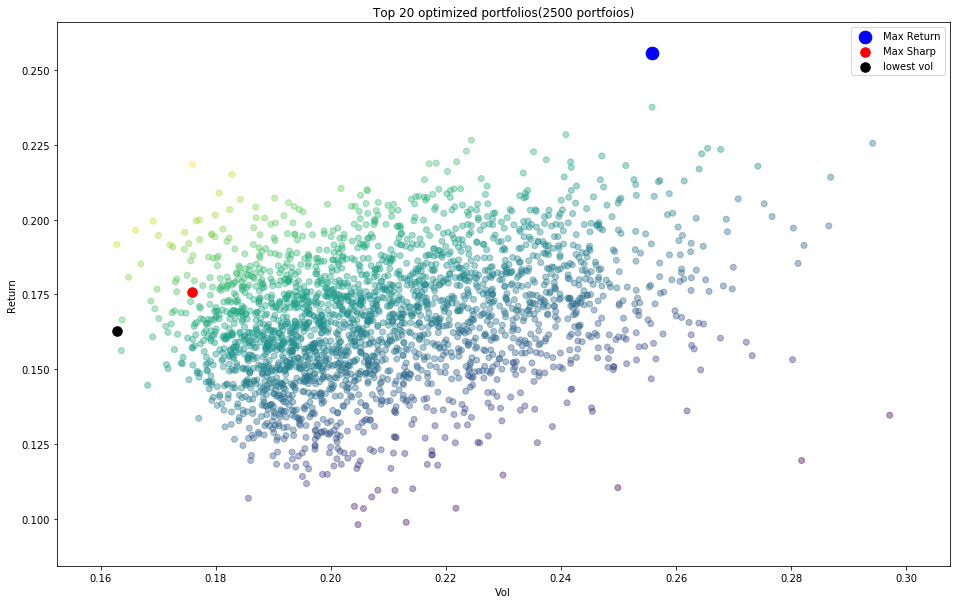

In [142]:
plt.figure(figsize=(16,10))
plt.scatter(all_vol, all_returns, c = all_sharp, alpha=0.4)
plt.scatter(all_vol[max_returns], all_vol[max_returns], c= "b", s = 160, label = "Max Return")
plt.scatter(all_vol[max_sharp], all_vol[max_sharp], c= "r", s = 90, label = "Max Sharp")
plt.scatter(all_vol[lowest_vol], all_vol[lowest_vol], c= "black", s = 90, label = "lowest vol")
plt.xlabel("Vol")
plt.ylabel("Return")
plt.title("Top 20 optimized portfolios(2500 portfoios)")
plt.legend()

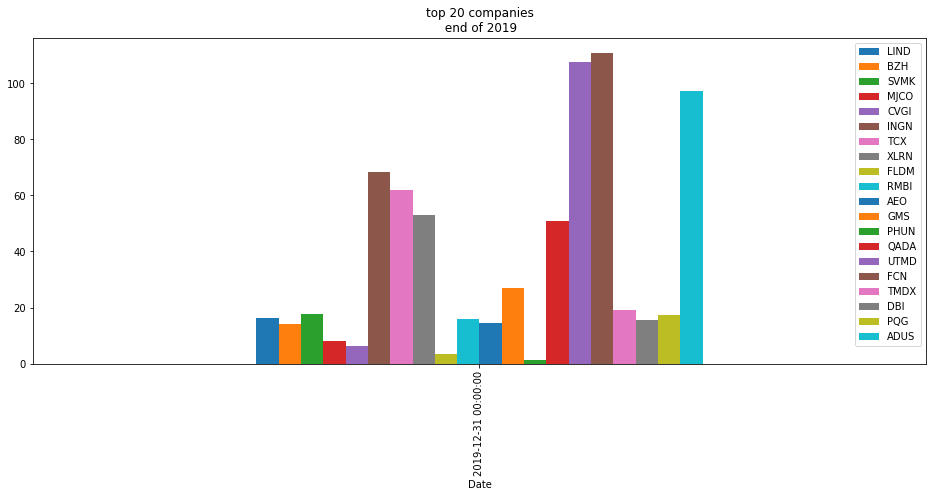

In [135]:
top_20_weighted_companies[-1:].plot(kind = "bar", figsize = (16,6))
plt.title("top 20 companies\n end of 2019")
plt.savefig("resources/top_20_portfolio_end0f_19.png")